## Standardization

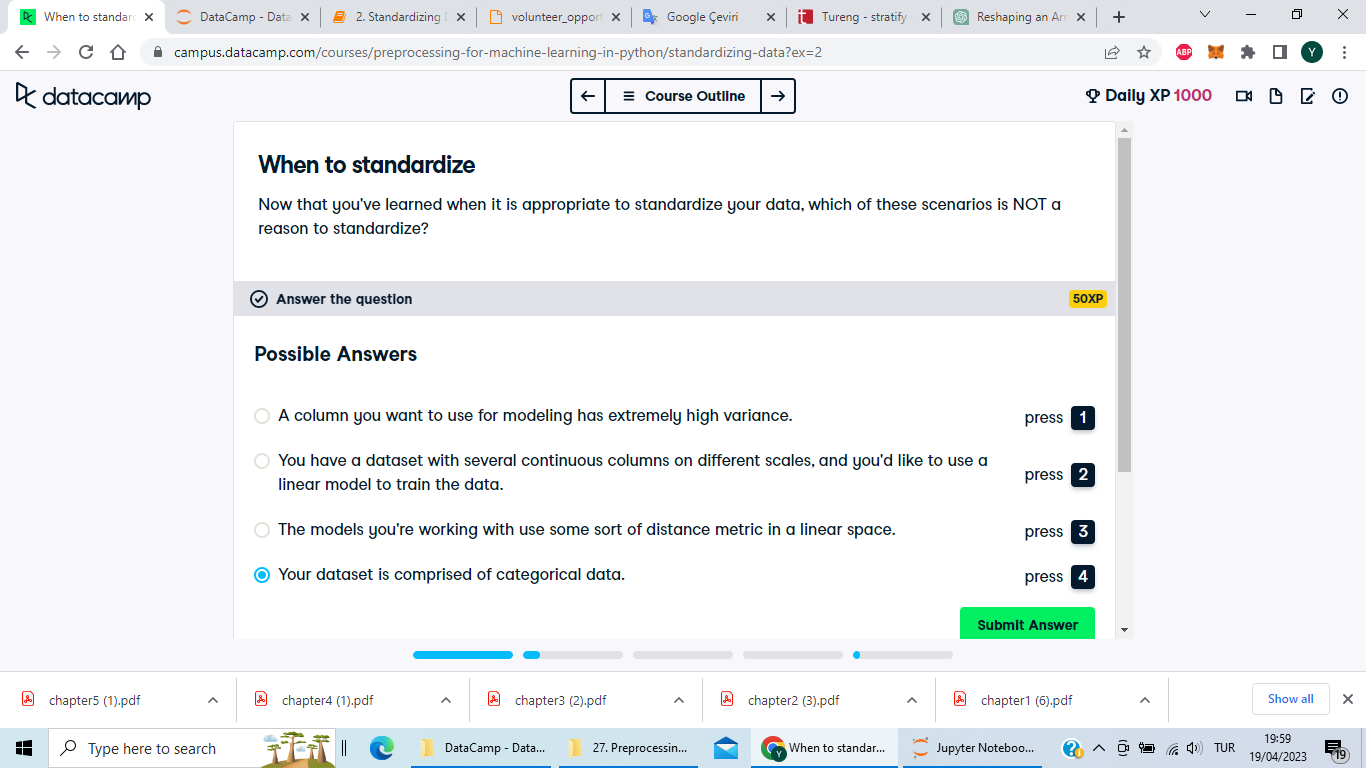

Correct! Standardization is a preprocessing task performed on numerical, continuous data.

#### Modeling without normalizing
Let's take a look at what might happen to your model's accuracy if you try to model data without doing some sort of standardization first.

Here we have a subset of the wine dataset. One of the columns, Proline, has an extremely high variance compared to the other columns. This is an example of where a technique like log normalization would come in handy, which you'll learn about in the next section.

The scikit-learn model training process should be familiar to you at this point, so we won't go too in-depth with it. You already have a k-nearest neighbors model available (knn) as well as the X and y sets you need to fit and score on.

In [12]:
import pandas as pd

wine = pd.read_csv('wine_types.TXT')
wine

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = wine.iloc[:,1:]
y = wine.loc[:,'Type']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

knn = KNeighborsClassifier()

# Fit the knn model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.7777777777777778


Great work. You can see that the accuracy score is pretty low. Let's explore methods to improve this score.

## Log normalization

#### Checking the variance
Check the variance of the columns in the wine dataset. Out of the four columns listed, which column is the most appropriate candidate for normalization?

#### Possible Answers

a.Alcohol<br>
b.Proline<br>
c.Proanthocyanins<br>
d.Ash<br>

In [14]:
wine[["Alcohol", "Proline","Proanthocyanins", "Ash"]].var()

Alcohol                0.659062
Proline            99166.717355
Proanthocyanins        0.327595
Ash                    0.075265
dtype: float64

So, <strong>Proline</strong> is a correct answer since it has a extremely high variance

#### Log normalization in Python
Now that we know that the Proline column in our wine dataset has a large amount of variance, let's log normalize it.

numpy has been imported as np.

In [15]:
import numpy as np

# Print out the variance of the Proline column
print(wine['Proline'].var())

# Apply the log normalization function to the Proline column
wine['Proline_log'] = np.log(wine['Proline'])

# Check the variance of the normalized Proline column
print(wine['Proline_log'].var())

99166.71735542428
0.17231366191842018


Nice work! The np.log() function is an easy way to log normalize a column.

## Scaling data for feature comparison
#### Scaling data - investigating columns
You want to use the Ash, Alcalinity of ash, and Magnesium columns in the wine dataset to train a linear model, but it's possible that these columns are all measured in different ways, which would bias a linear model.

Which of the following statements are true about these columns is true?

In [16]:
wine[["Ash","Alcalinity of ash","Magnesium","Alcohol","Malic acid"]]

,Ash,Alcalinity of ash,Magnesium,Alcohol,Malic acid
0,2.43,15.6,127,14.23,1.71
1,2.14,11.2,100,13.20,1.78
2,2.67,18.6,101,13.16,2.36
3,2.50,16.8,113,14.37,1.95
4,2.87,21.0,118,13.24,2.59
...,...,...,...,...,...
173,2.45,20.5,95,13.71,5.65
174,2.48,23.0,102,13.40,3.91
175,2.26,20.0,120,13.27,4.28
176,2.37,20.0,120,13.17,2.59


In [17]:
wine[["Ash","Alcalinity of ash","Magnesium","Alcohol","Malic acid"]].var()

Ash                    0.075265
Alcalinity of ash     11.152686
Magnesium            203.989335
Alcohol                0.659062
Malic acid             1.248015
dtype: float64

In [18]:
wine[["Ash","Alcalinity of ash","Magnesium","Alcohol","Malic acid"]].std()

Ash                   0.274344
Alcalinity of ash     3.339564
Magnesium            14.282484
Alcohol               0.811827
Malic acid            1.117146
dtype: float64

In [19]:
wine[["Ash","Alcalinity of ash","Magnesium","Alcohol","Malic acid"]].mean()

Ash                   2.366517
Alcalinity of ash    19.494944
Magnesium            99.741573
Alcohol              13.000618
Malic acid            2.336348
dtype: float64

In [20]:
wine[["Ash","Alcalinity of ash","Magnesium","Alcohol","Malic acid"]].max()

Ash                    3.23
Alcalinity of ash     30.00
Magnesium            162.00
Alcohol               14.83
Malic acid             5.80
dtype: float64

<strong>Possible Answers</strong><br>
<br>
a.The standard deviation of Alcohol is greater than the standard deviation of Malic acid.<br>
b.The standard deviations of Ash and Alcalinity of ash are equal.<br>
<strong>c.The max of Ash is 3.23, the max of Alcalinity of ash is 30, and the max of Magnesium is 162.</strong><br>
d.The mean Malic acid is greater than the mean Ash.

Correct! Understanding your data is a crucial first step before deciding on the most appropriate standardization technique.

#### Scaling data - standardizing columns
Since we know that the Ash, Alcalinity of ash, and Magnesium columns in the wine dataset are all on different scales, let's standardize them in a way that allows for use in a linear model.

In [21]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Subset the DataFrame you want to scale 
wine_subset = wine[["Ash","Alcalinity of ash","Magnesium"]]

# Apply the scaler to wine_subset
wine_subset_scaled = scaler.fit_transform(wine_subset)

Good job! In scikit-learn, running .fit_transform() during preprocessing will both fit the method to the data as well as transform the data in a single step.

## Standardized data and modeling

#### KNN on non-scaled data
Before adding standardization to your scikit-learn workflow, you'll first take a look at the accuracy of a K-nearest neighbors model on the wine dataset without standardizing the data.

The knn model as well as the X and y data and labels sets have been created already.

In [22]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.7777777777777778


Well done! This accuracy definitely isn't poor, but let's see if we can improve it by standardizing the data.

#### KNN on scaled data
The accuracy score on the unscaled wine dataset was decent, but let's see what you can achieve by using standardization. Once again, the knn model as well as the X and y data and labels set have already been created for you.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Instantiate a StandardScaler
scaler = StandardScaler()

# Scale the training and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train_scaled, y_train)

# Score the model on the test data
print(knn.score(X_test_scaled, y_test))

0.9333333333333333


Excellent! That's quite the improvement, and definitely made scaling the data worthwhile.